In [1]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

from tabpfn import TabPFNClassifier

In [2]:
bruh = pd.read_csv("./merged_data.csv")

In [9]:
df1 = bruh.drop(['activity', 'acc_y_enwacto_5', 'acc_y_enwacto_6', 'acc_y_enwacto_7',
       'acc_x_enwacto_1', 'acc_x_enwacto_2', 'acc_x_enwacto_3',
       'acc_x_enwacto_4', 'acc_x_enwacto_5', 'acc_x_enwacto_6', 'acc_x_enwacto_7', 'name'], axis=1)
df2 = bruh[['activity']]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.33, random_state=42)
classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)
classifier.fit(X_train, y_train, overwrite_warning=True)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)

print('Accuracy', accuracy_score(y_test, y_eval))

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


ValueError: could not convert string to float: 'kuba'

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.5806845965770171


F:\anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(34.0, 0.5, 'True Labels')

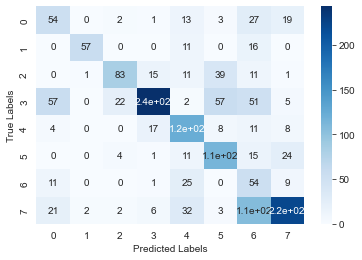

In [12]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.33, random_state=42)
clf = LinearSVC(random_state=42, tol=1e-5, max_iter=50000)
clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
y_eval = clf.predict(X_test)
print('Accuracy', score)
confusion_mat = confusion_matrix(y_test, y_eval)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

Text(33.0, 0.5, 'True Labels')

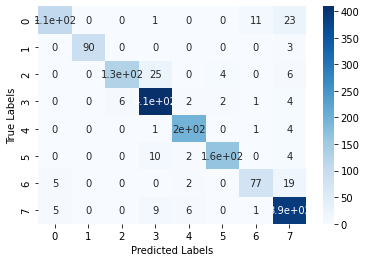

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_mat = confusion_matrix(y_test, y_eval)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")